- Import necessary libraries

In [1]:

import pandas as pd
import numpy as np

# Library to use random forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# To split data into train and test
from sklearn.model_selection import train_test_split

# To convert string to numeric
from sklearn.preprocessing import LabelEncoder

# To calculate evaluation metric
from sklearn.metrics import r2_score, mean_squared_error, classification_report, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

#Visuliazation of decision tree
from sklearn import tree

import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 1000
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

# Company_data

- Load your dataset

In [2]:
df = pd.read_csv('D:\Data Science Assignments\Assignment 15 Random forest\company_data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


- Preprocess the data

In [3]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:

label_encoder = LabelEncoder()
categorical_columns = ['ShelveLoc', 'Urban', 'US']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


<Axes: >

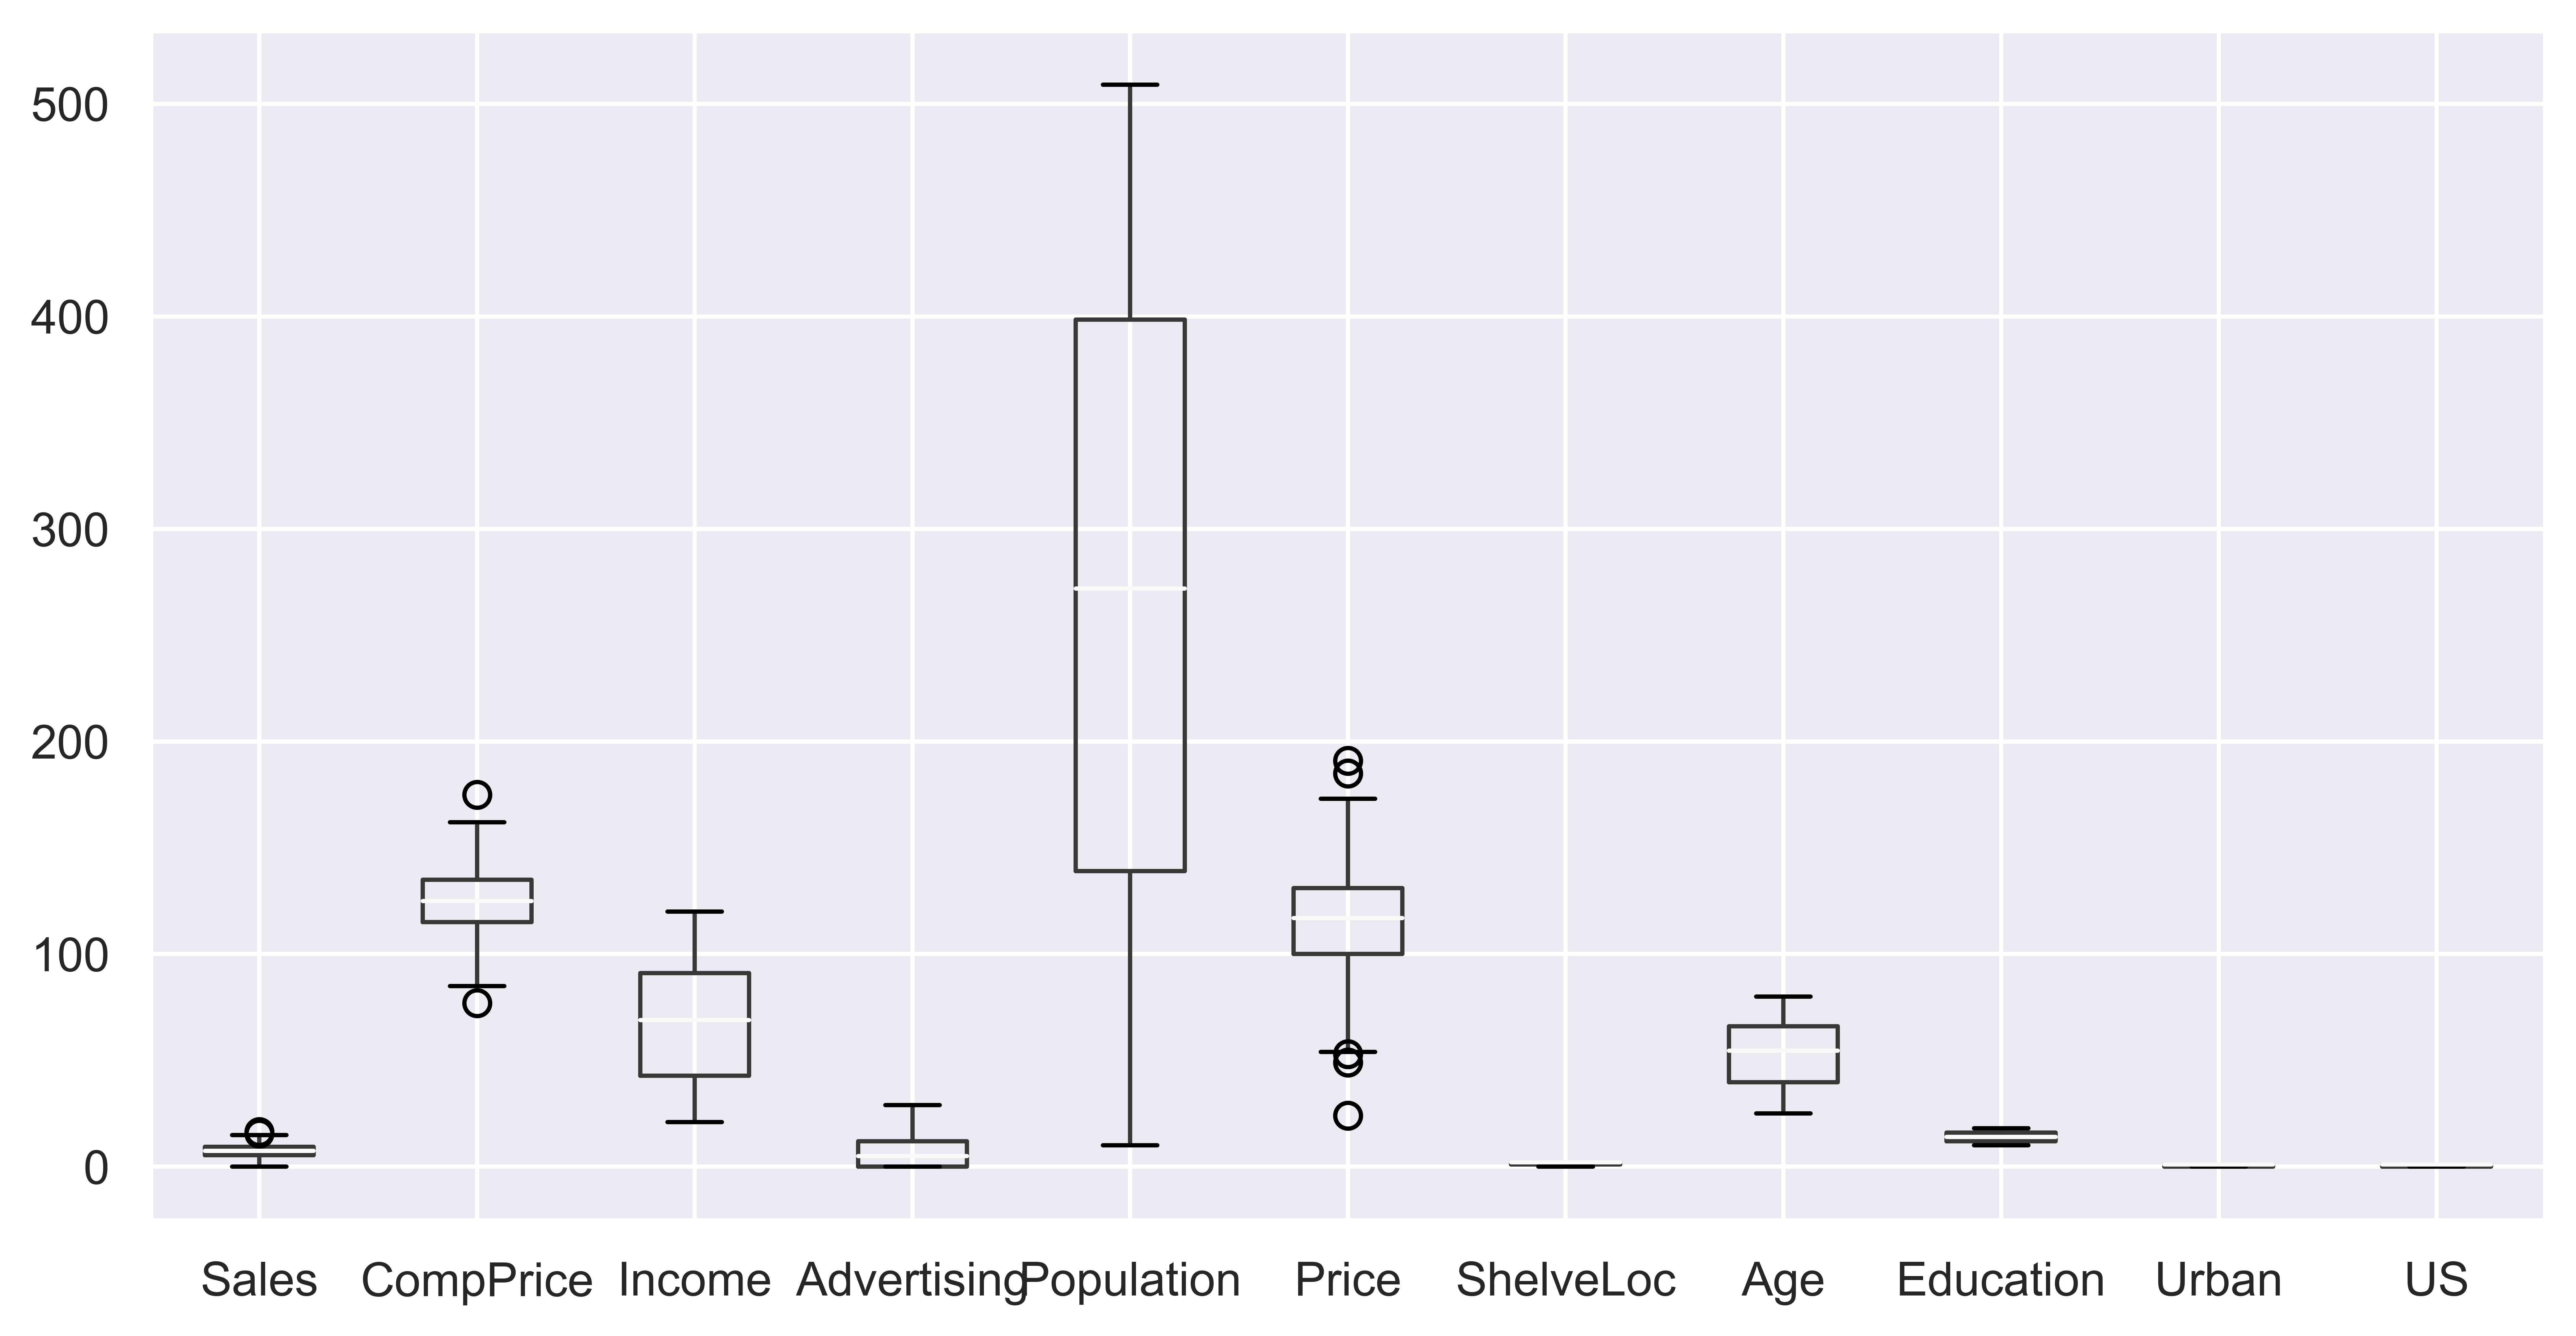

In [7]:
df.boxplot()

In [8]:
def outlier_detection(data, cols):
    
    for col in cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        data[col] = np.where(data[col] > upper, upper, np.where(data[col] < lower, lower,data[col]))

In [9]:
outlier_detection(df,df.columns)

In [10]:
df.boxplot()
#plt.show()

<Axes: >

In [11]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064143,0.153249,0.268872,0.050056,-0.443599,0.158550,-0.231735,-0.050562,-0.016324,0.176794
CompPrice,0.064143,1.000000,-0.081120,-0.031268,-0.099397,0.579543,0.023278,-0.101345,0.028674,0.066958,0.014018
Income,0.153249,-0.081120,1.000000,0.058995,-0.007877,-0.055626,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.268872,-0.031268,0.058995,1.000000,0.265652,0.042374,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050056,-0.099397,-0.007877,0.265652,1.000000,-0.016705,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.443599,0.579543,-0.055626,0.042374,-0.016705,1.000000,0.019539,-0.103942,0.016256,0.049531,0.053930
ShelveLoc,0.158550,0.023278,-0.067678,0.008544,-0.044772,0.019539,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231735,-0.101345,-0.004670,-0.004557,-0.042663,-0.103942,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.050562,0.028674,-0.056855,-0.033594,-0.106378,0.016256,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.016324,0.066958,0.037967,0.042035,-0.052025,0.049531,-0.063978,0.028479,-0.033094,1.000000,0.047085


In [12]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

- Split the data into training and testing sets

In [13]:
x = df.iloc[:,:-1] #select all columns expect last
y = df['Sales']

In [14]:
# Split the data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

- Train the Random Forest model

In [15]:
rf = RandomForestRegressor() # For Regression 

rf.fit(xtrain,ytrain)  # Create all decision trees in the backend



- Make predictions on the test set

In [ ]:
ypred = rf.predict(xtest)

- Evaluate the model

In [16]:
# Calculate evaluation metric for regression to check model performaning is good or not
print(f"R2 values: {r2_score(ytest,ypred)}")
print(f"MSE: {mean_squared_error(ytest,ypred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest,ypred))}")

R2 values: 0.993536327213736
MSE: 0.05362552031250001
RMSE: 0.23157184697734742


In [17]:
rf.estimators_

[DecisionTreeRegressor(max_features=1.0, random_state=1445574749),
 DecisionTreeRegressor(max_features=1.0, random_state=467809447),
 DecisionTreeRegressor(max_features=1.0, random_state=970809622),
 DecisionTreeRegressor(max_features=1.0, random_state=1831077172),
 DecisionTreeRegressor(max_features=1.0, random_state=192160472),
 DecisionTreeRegressor(max_features=1.0, random_state=16292588),
 DecisionTreeRegressor(max_features=1.0, random_state=1893064604),
 DecisionTreeRegressor(max_features=1.0, random_state=1270318206),
 DecisionTreeRegressor(max_features=1.0, random_state=24532114),
 DecisionTreeRegressor(max_features=1.0, random_state=272240811),
 DecisionTreeRegressor(max_features=1.0, random_state=37028873),
 DecisionTreeRegressor(max_features=1.0, random_state=385356397),
 DecisionTreeRegressor(max_features=1.0, random_state=352946931),
 DecisionTreeRegressor(max_features=1.0, random_state=1327995903),
 DecisionTreeRegressor(max_features=1.0, random_state=952122387),
 Decisio

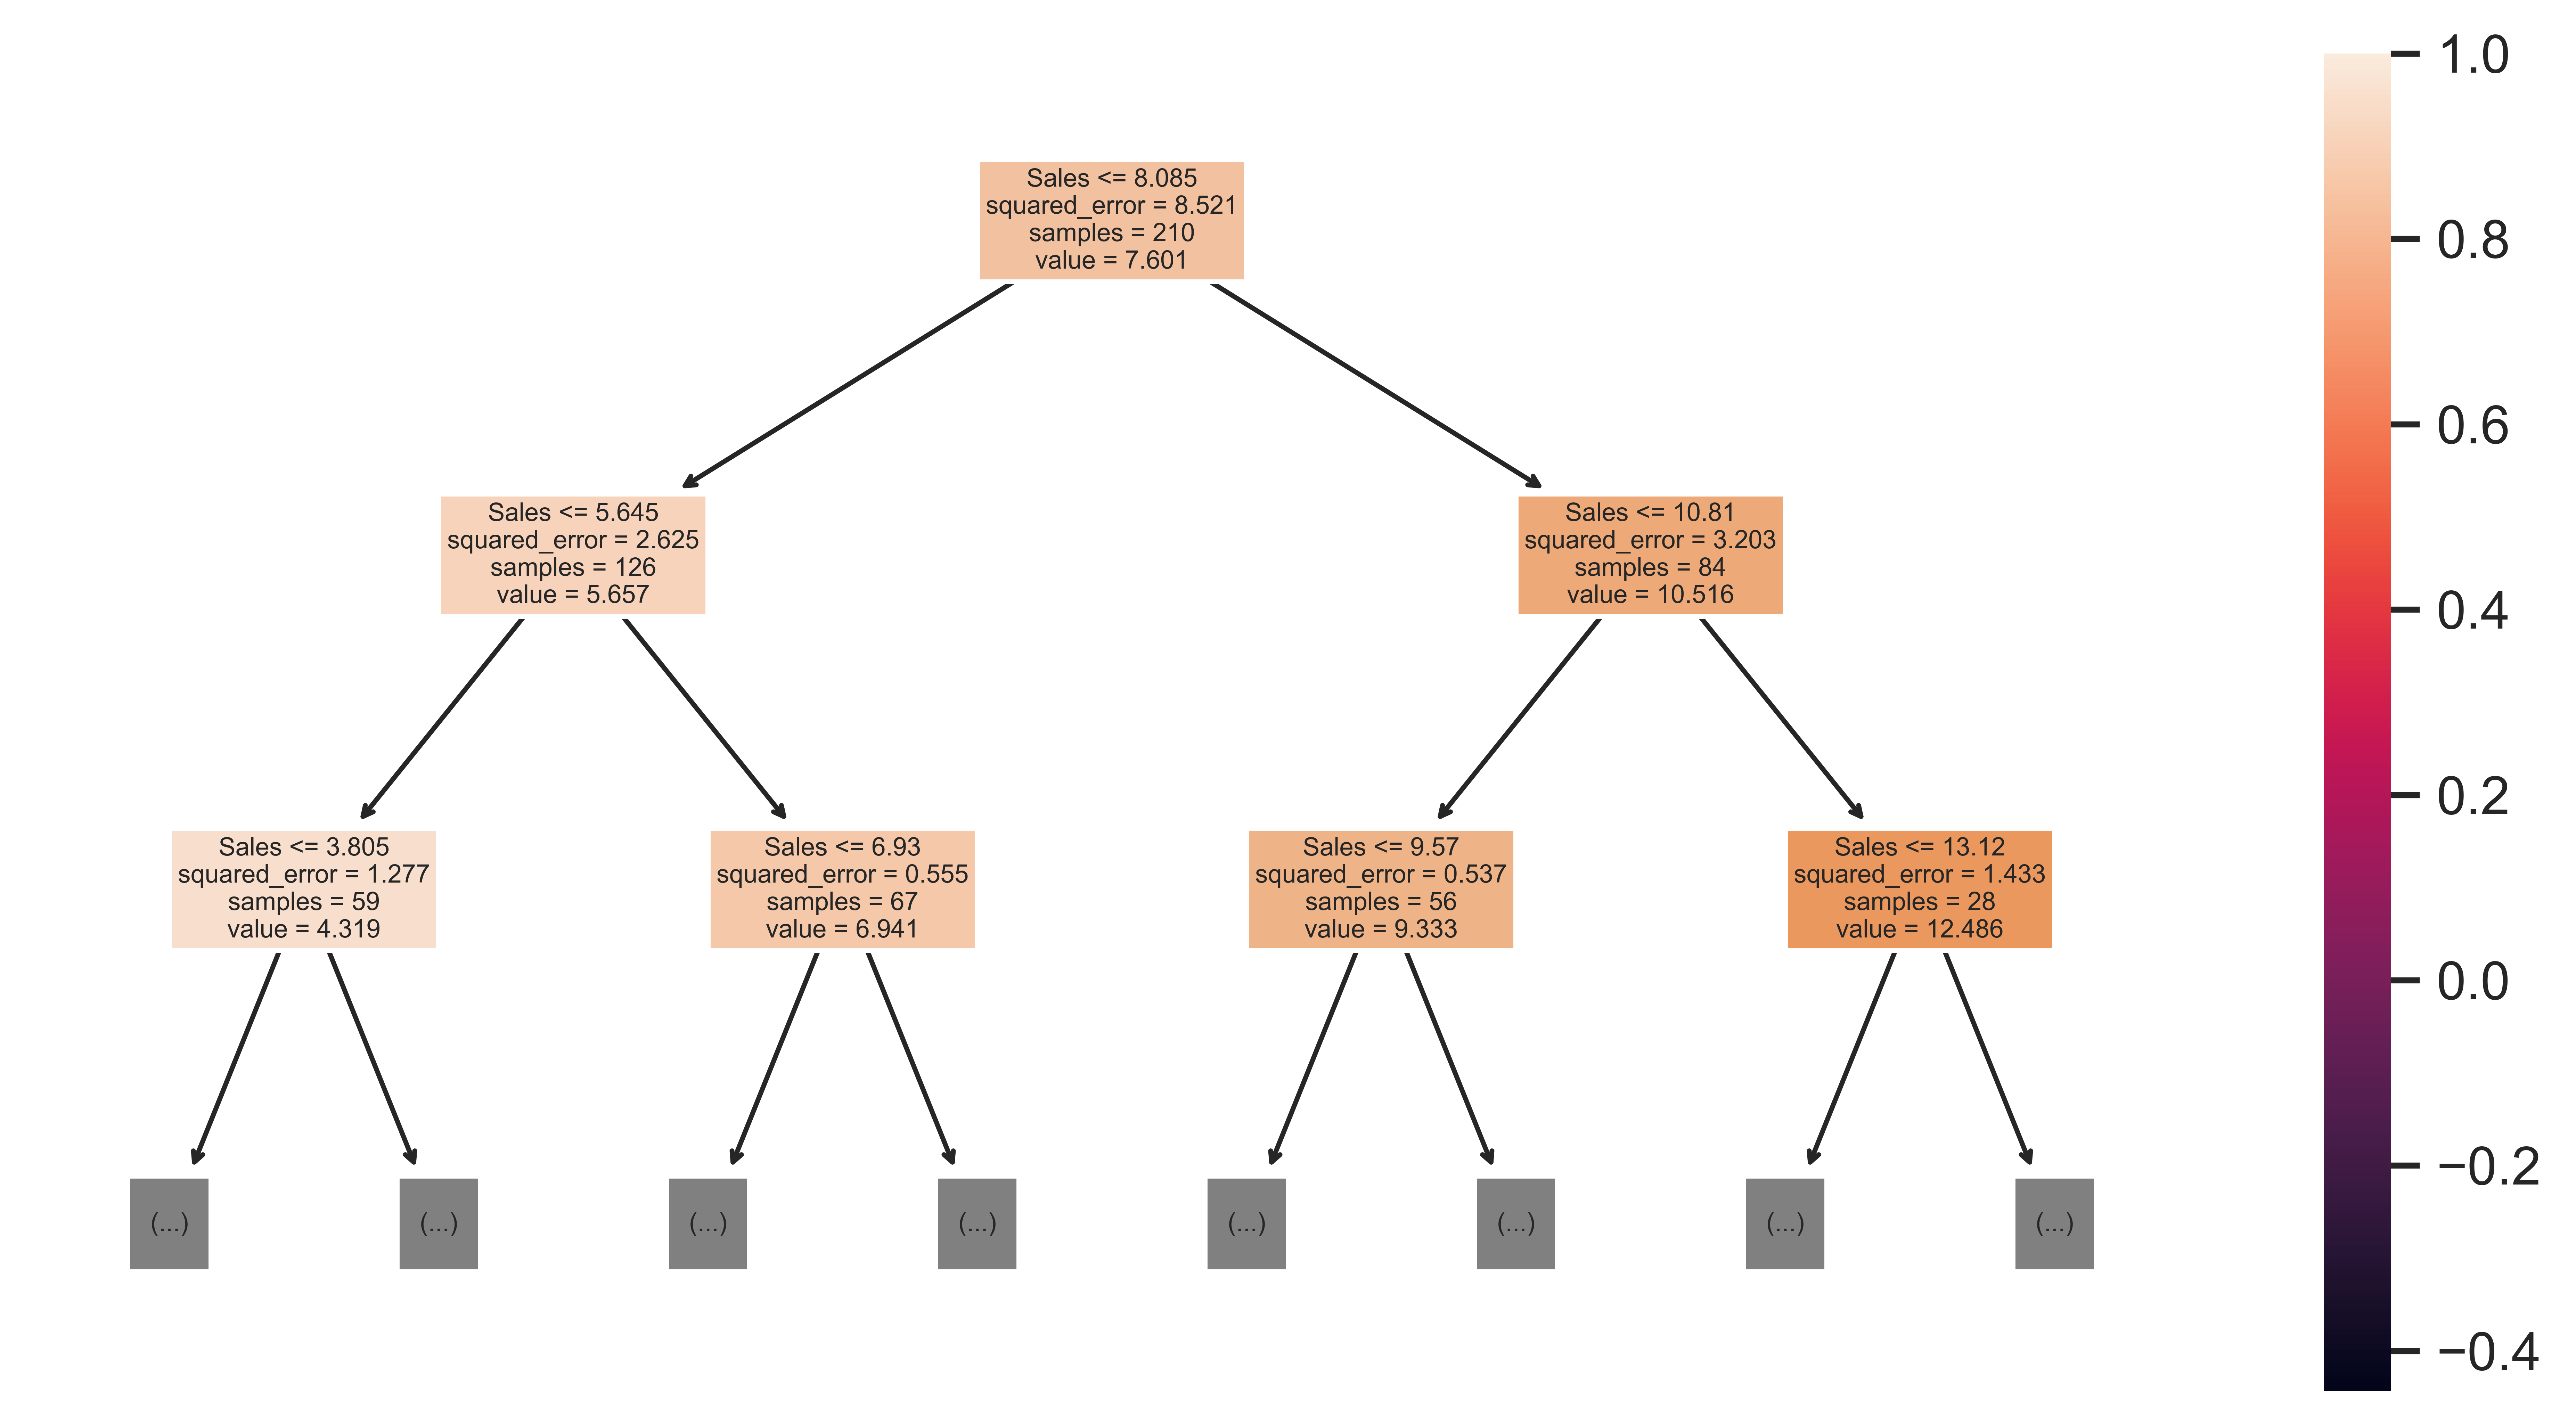

In [18]:
tree.plot_tree(rf.estimators_[0], feature_names=['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban'],filled=True, max_depth=2)
plt.show()

# Fraud Check

In [19]:
data = pd.read_csv('D:\Data Science Assignments\Assignment 15 Random forest\Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [21]:
data.duplicated().sum()

0

In [22]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [23]:
data.boxplot()

<Axes: >

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Undergrad','Marital.Status','Urban']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


In [26]:
# Assuming 'taxable_income' is the column containing taxable income
data['Risk'] = data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

In [27]:
# Drop the original 'taxable_income' column if necessary
data = data.drop('Taxable.Income', axis=1)

In [28]:
# Separate features and target variable
X = data.drop('Risk', axis=1)
y = data['Risk']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = rf_model.predict(X_test)

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.775

Confusion Matrix:
 [[93  1]
 [26  0]]

Classification Report:
               precision    recall  f1-score   support

        Good       0.78      0.99      0.87        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.61      0.78      0.68       120



In [33]:
rf = RandomForestRegressor() # For Regression 

rf.fit(xtrain,ytrain)  # Create all decision trees in the backend

ypred = rf.predict(xtest)

In [34]:
# Calculate evaluation metric for regression to check model performaning is good or not
print(f"R2 values: {r2_score(ytest,ypred)}")
print(f"MSE: {mean_squared_error(ytest,ypred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest,ypred))}")

R2 values: 0.9943163032563427
MSE: 0.04715449021875004
RMSE: 0.2171508466913036
